# Grab a selection of census tract data
*This notebook provides an example of how you can extract features from an ArcGIS online resource and save them into a shapefile on your local machine.* 

→ A good resource for learning more is here: https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/

In [1]:
#Import the GIS object and authenticate
from arcgis import GIS
gis = GIS('pro')

In [18]:
#Use the API's content' helper to search for feature layers with keyword Census
results = gis.content.search(query='census Tract ',
                             item_type='Feature Layer',
                             outside_org=True)
results

[<Item title:"Low Income Community Census Tracts - 2016 ACS" type:Feature Layer Collection owner:lisaberry_UO>,
 <Item title:"USA Block Groups" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"California Census Tract Boundaries" type:Feature Layer Collection owner:Ferrar@FracTracker.org>,
 <Item title:"ACS Population Variables - Boundaries" type:Feature Layer Collection owner:esri_demographics>,
 <Item title:"CDC’s Social Vulnerability Index (SVI) – 2014 overall SVI, census tract level" type:Feature Layer Collection owner:data_cdc>,
 <Item title:"USA Tracts" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"USA Counties" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Dissemination Areas" type:Feature Layer Collection owner:cmxadmin>,
 <Item title:"Homeless Count by Council District - 2019" type:Feature Layer Collection owner:nathan@lahsa>,
 <Item title:"NAVTEQNCDOTComparison" type:Feature Layer Collection owner:ssarakaitis>]

<Item title:"ACS Population Variables - Boundaries" type:Feature Layer Collection owner:esri_demographics>
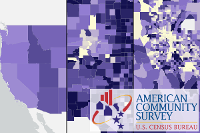

In [19]:
#Have a look at the 2nd result
results[3]

In [20]:
#Save it as an arcgis "item" object
tractsItem = results[3]
type(tractsItem)

arcgis.gis.Item

→ More info on the ArcGIS `item` object: https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.toc.html#item

In [21]:
#Get the layer from the item
tractsLyr = tractsItem.layers[0]
type(tractsLyr)

arcgis.features.layer.FeatureLayer

→ More info on the ArcGIS `layer` object: https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.toc.html#layer<br>
→ More info on the ArcGIS `FeatureLayer` object: https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#featurelayer

---
### Subsetting and downloading content
Now that we have what we want as a FeatureLayer object, we can query that layer for just the features we we want to download. Before diving into our query, we'll need to familiarize ourselves with the data. 

Below are a set of steps mirrored after ESRI's documentation on querying feature layers:<br>
https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/#Querying-feature-layers

* First, we could just examine the ESRI REST endpoint for this dataset. To do that, we'd just reveal the URL associated with the data layer...

In [22]:
print(tractsLyr.url)

https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Total_Population_Boundaries/FeatureServer/0


* Or we could remain in our Python coding environment and reveal key properties using API functions:

In [23]:
#List the fields associated with the raster
for f in tractsLyr.properties.fields:
    print(f['name'],end=', ')

OBJECTID, STATENS, GEOID, STUSPS, NAME, ALAND, AWATER, B01001_001E, B01001_001M, B01001_002E, B01001_002M, B01001_003E, B01001_003M, B01001_004E, B01001_004M, B01001_005E, B01001_005M, B01001_006E, B01001_006M, B01001_007E, B01001_007M, B01001_008E, B01001_008M, B01001_009E, B01001_009M, B01001_010E, B01001_010M, B01001_011E, B01001_011M, B01001_012E, B01001_012M, B01001_013E, B01001_013M, B01001_014E, B01001_014M, B01001_015E, B01001_015M, B01001_016E, B01001_016M, B01001_017E, B01001_017M, B01001_018E, B01001_018M, B01001_019E, B01001_019M, B01001_020E, B01001_020M, B01001_021E, B01001_021M, B01001_022E, B01001_022M, B01001_023E, B01001_023M, B01001_024E, B01001_024M, B01001_025E, B01001_025M, B01001_026E, B01001_026M, B01001_027E, B01001_027M, B01001_028E, B01001_028M, B01001_029E, B01001_029M, B01001_030E, B01001_030M, B01001_031E, B01001_031M, B01001_032E, B01001_032M, B01001_033E, B01001_033M, B01001_034E, B01001_034M, B01001_035E, B01001_035M, B01001_036E, B01001_036M, B01001_03

* Now we'll construct a query function, much like if we were invoking the REST interface, but instead using the API functions, which streamline these things. 

In [ ]:
tractsLyr.

In [24]:
#Query the tracts feature layer for records falling within Durham Co (FIPS 37063)
query_result = tractsLyr.query("GEOID LIKE '37063%'")
type(query_result)

arcgis.features.feature.FeatureSet

→ More info on the `Feature Set` object: https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#featureset

In [25]:
#Reveal how many features were extracted: 
len(query_result)

0

In [26]:
#Save the feature set as shapefile
outFN = query_result.save('.','MyFeatures')
print("Output saved as {}".format(outFN))

Output saved as .\MyFeatures.shp


### Or, analyzing the data here, as a dataframe

In [27]:
#Convert the feature set data as a dataframe
df = query_result.sdf
df.head()

""


* Note the output has a column called "SHAPE". These values are ArcGIS API `geometry` objects. 

#### Analyzing geometry

In [ ]:
#Get the value in the first row of the "SHAPE" column
feat = df.loc[0,'SHAPE']
type(feat)

https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.geometry.html#arcgis.geometry.Geometry.get_area

In [ ]:
#Get the area, in square miles
feat.get_area(method='GEODESIC',units='MILES')

#### Analyzing age demographics

In [ ]:
#Grab the first 10 columns into a new dataframe
ageColsDF = df.iloc[:,:9]

In [ ]:
#Summarize those columns
ageColsDF.describe()

In [ ]:
#Plot demographics: count within each age group
ageCols.sum()

In [ ]:
%matplotlib inline
ageCols.sum().plot(kind='bar');